In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)  # Convert target to integer type
print(f"Shape of dataset: {X.shape}")


Shape of dataset: (70000, 784)


In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions (e.g., 50 components)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print(f"Shape of dataset after PCA: {X_pca.shape}")


Shape of dataset after PCA: (70000, 50)


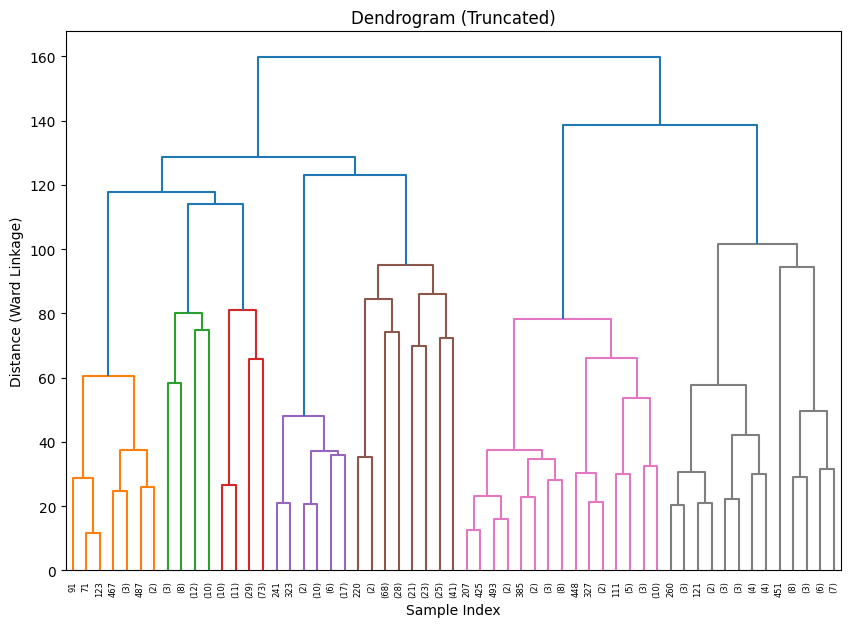

In [4]:
# Generate a dendrogram for a small subset of the data (e.g., 500 samples)
sample_size = 500
X_sample = X_pca[:sample_size]
y_sample = y[:sample_size]

# Perform hierarchical clustering (linkage)
Z = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrogram (Truncated)")
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward Linkage)')
plt.show()
